In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
im_bgr = cv2.imread('sunflowers.png')
im_bgr.shape

(264, 406, 3)

In [6]:
Z = im_bgr.reshape((-1,3))
Z.shape

(107184, 3)

In [8]:
Z = np.float32(Z)
Z.dtype

dtype('float32')

In [17]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 9  # K-means
ret,label,center=cv2.kmeans(Z,K,None,criteria,6,cv2.KMEANS_RANDOM_CENTERS) # 6 번을 수행해서.. 제일좋은 결과 리턴 
ret, label, center

(58405800.78662887,
 array([[8],
        [8],
        [5],
        ...,
        [4],
        [3],
        [3]], dtype=int32),
 array([[178.66158 , 139.70065 , 113.867256],
        [ 84.26863 , 129.48859 , 148.4036  ],
        [ 25.948812, 108.78596 , 153.38213 ],
        [ 28.695572,  69.61956 ,  86.43846 ],
        [ 53.957516, 100.38089 , 108.77127 ],
        [176.79245 , 172.25003 , 170.2652  ],
        [ 17.69796 ,  43.814285,  50.703403],
        [ 34.019608, 156.83104 , 208.18214 ],
        [199.21475 , 197.30513 , 195.6398  ]], dtype=float32))

In [18]:
np.unique(label)
center

array([[178.66158 , 139.70065 , 113.867256],
       [ 84.26863 , 129.48859 , 148.4036  ],
       [ 25.948812, 108.78596 , 153.38213 ],
       [ 28.695572,  69.61956 ,  86.43846 ],
       [ 53.957516, 100.38089 , 108.77127 ],
       [176.79245 , 172.25003 , 170.2652  ],
       [ 17.69796 ,  43.814285,  50.703403],
       [ 34.019608, 156.83104 , 208.18214 ],
       [199.21475 , 197.30513 , 195.6398  ]], dtype=float32)

In [19]:
center = np.uint8(center)
res = center[label.flatten()]
# 이미지로 변환 
im_seg_k20 = res.reshape((im_bgr.shape))

(<matplotlib.image.AxesImage at 0x2a672cc0e50>,
 (-0.5, 405.5, 263.5, -0.5),
 Text(0.5, 1.0, 'k=3'))

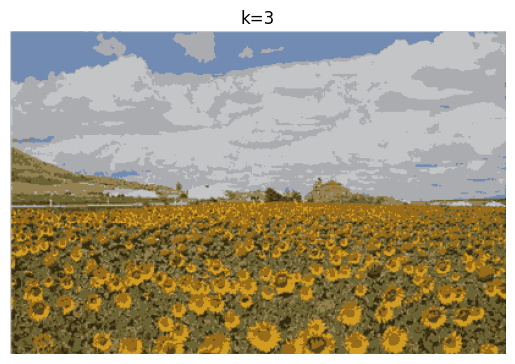

In [20]:
plt.imshow(im_seg_k20[:,:,::-1]), plt.axis('off'), plt.title('k=3')